<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/Perceptron/Perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Calculate linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply step activation function
                y_pred = 1 if linear_output > 0 else 0
                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)


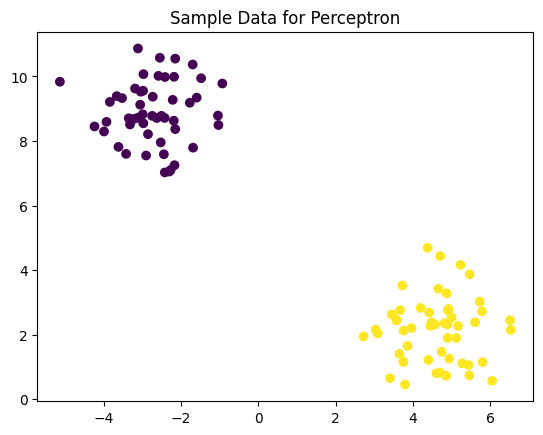

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Sample Data for Perceptron")
plt.show()


In [ ]:
# Initialize the Perceptron model
perceptron = Perceptron(learning_rate=0.1, epochs=1000)

# Train the model
perceptron.fit(X_train, y_train)

# Predict on test data
y_pred = perceptron.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


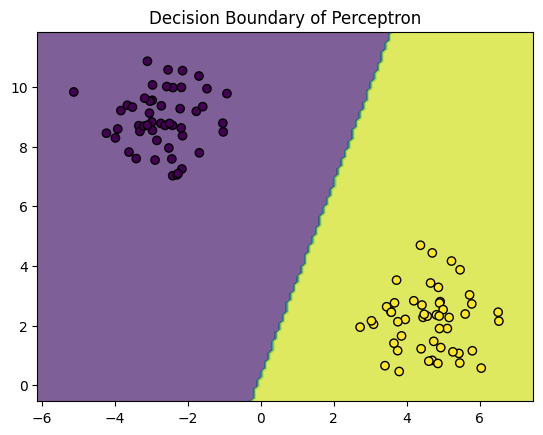

In [ ]:
# Visualize decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Decision Boundary of Perceptron")
plt.show()
